# **SQL for Data Science Capstone Project** 

### Business data analysis of an online buying and selling site

 Author : *Sahand Niasti*

*March, 2020*

![Image](https://hotmaillog.in/wp-content/uploads/2019/05/Sell-and-Buy-Online.png)

# 1.Introduction/ Business Problem

A fictional website ‘sell-your-stuff.com’ allows clients to buy and sell items that are not being
used anymore (chairs, laptops, books, etc.). Some of the clients make their living by buying
products refurbishing and then reselling It. But most are only interested in selling things they
don’t use anymore or buying cheap stuff.[1]

The process is quite simple. a client creates an account (choosing one of the possible account
types, each account type follows specific rules and legislations for different types of products
and countries). One client can have only one account. After account creation clients need to deposit money to buy/sell products, as the website itself works as a broker and guarantees that both clients will be satisfied.

The management of sell-your-stuff.com wants to set up marketing strategies for the next fiscal
year based on the summary tables. Our main Goal is to analyse the performance of past campaigns,
coupons, profit by countries, etc. and make a report showing information to support our
insights.

# 2. Importing Dataset

Three different tables related to our site required to be imported in order to be ready for further analysis. each table has been summarizely introduced below :

* clients: Basic anonymized information about clients and client’s account.
* transactions: Summary of transactions amounts of each account aggregated daily.
* campaigns: High level description of past marketing campaigns, dates and budget.

## 2.1. Importing Libraries

We will first import all important libraries to be used on this section and the required codes for further secotrs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#!pip install pandasql
from pandasql import sqldf

pysqldf = lambda q : sqldf(q,globals())


## 2.2.importing Dataset

The data was primarily a SQLite3 database. Each table was exported separately to examine closely by python programming language.
after importing the dataset as a pandas dataframe, basic profiling data was extracted from each table to understand data a bit better.

### 2.2.1. "clients" Data importing

This table consists of 10 columns with different values which is explained below.

* ​account​: Unique index linked to an account.
* ​type​: Type of the account.
* residence​: Country of residence of the client (ISO 3166-1 alpha-2).
* ​date_joined​: Date of account creation.
* indication_coupon​: If the client was indicated by some of the partners this value reflects the partner’s ID.
* first_deposit_amount​: Amount deposited on client’s first deposit (in US dollar).
* first_deposit_date​: Date of first deposit.
* first_transaction_amount​: Amount of client’s first transaction (in US dollar).
* first_transaction_date​: Date of first transaction.
* balance_amount:​ Current balance.



In [2]:
clients = pd.read_csv('clients.csv')
clients.head()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,NaN,NaN,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62
2,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14
3,3876,type_6,mm,2017-11-01,232,9090.91,2017-11-01,NaN,NaN,-90909.09
4,4973,type_6,lk,2018-06-09,308,9090.91,2018-06-09,0.110000,2018-06-11,8974.12


In [3]:
clients.describe(include= 'all')

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
count,5000.000000,5000,4698,5000,5000.000000,3959.000000,3964,2606.000000,2608,3.964000e+03
unique,NaN,8,136,706,NaN,NaN,704,NaN,682,NaN
top,NaN,type_6,id,2018-09-24,NaN,NaN,2018-09-26,NaN,2018-07-10,NaN
freq,NaN,3238,1667,18,NaN,NaN,16,NaN,14,NaN
mean,3499.500000,NaN,NaN,NaN,280.059000,7972.617336,NaN,62.299371,NaN,-3.614863e+05
std,1443.520003,NaN,NaN,NaN,72.958655,5898.371677,NaN,296.155525,NaN,1.812420e+06
min,1000.000000,NaN,NaN,NaN,0.000000,1.390000,NaN,0.070000,NaN,-2.905925e+07
25%,2249.750000,NaN,NaN,NaN,308.000000,9090.910000,NaN,0.520000,NaN,-9.090909e+04
50%,3499.500000,NaN,NaN,NaN,308.000000,9090.910000,NaN,1.550000,NaN,1.964535e+03
75%,4749.250000,NaN,NaN,NaN,308.000000,9090.910000,NaN,9.089630,NaN,9.090910e+03


### 2.2.2. "transactions" Data importing

This table consists of 9 columns with different values which is explained below.

* transaction_date​: Date (ISO 8601 up to day).
* account:​ Index to connect to client’s account.
* total_buy​: Total spend on the day buying products (in US dollar).
* total_sell​: Total earned on the day selling products (in US dollar).
* total_deposits​: Total deposited on the day (in US dollar).
* total_withdrawals​: Total withdrawn on the day (in US dollar).
* count_contracts​: Number of items sold on the day (each item represents a different contract).
* count_deposits ​: Number of deposits on the day (a client can deposit multiple times on a day).
* count_withdrawals :​ Number of withdrawals on the day (a client can withdraw multiple times on a day).

In [4]:
transactions = pd.read_csv('transactions.csv')
transactions.head()


,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-05-25,1093,NaN,NaN,NaN,3.15,0,0,1
1,2017-03-18,1093,7.50,6.50,100.0,NaN,72,1,0
2,2017-03-17,1093,48.63,38.51,1000.0,NaN,93,2,0
3,2018-12-10,2622,36.29,32.99,NaN,NaN,44,0,0
4,2018-12-09,2622,101.19,102.56,NaN,NaN,76,0,0


In [5]:
transactions.describe()

,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
count,36747.000000,33169.000000,32921.000000,8242.00000,16685.000000,36747.000000,36747.000000,36747.000000
mean,3098.360927,2327.151810,1807.789838,6860.93906,88211.235859,255.985468,0.292786,0.084850
std,1361.246105,10855.111743,8532.686975,9210.63811,31763.767680,4529.950176,0.707798,0.524256
min,1001.000000,0.070000,0.030000,1.30000,0.200000,0.000000,0.000000,0.000000
25%,1873.500000,4.500000,3.860000,350.00000,100000.000000,3.000000,0.000000,0.000000
50%,3153.000000,28.190000,23.920000,9090.91000,100000.000000,15.000000,0.000000,0.000000
75%,4052.500000,259.170000,217.180000,9090.91000,100000.000000,68.000000,0.000000,0.000000
max,5999.000000,100000.000000,100000.000000,100000.00000,100000.000000,248789.000000,17.000000,33.000000


### 2.2.3. "campaigns" Data importing

This table consists of 4 columns with different values which is explained below.

* start_date​: Date in which the company started the campaign (ISO 8601 up to day).
* end_date​: Date in which the company finished the campaign (ISO 8601 up to day).
* total_spend​: Total spend for the campaign (including all expenses, in US dollar) 
* country​: Country in which the campaign was focuses (ISO 3166-1 alpha-2), Null values represents global campaigns.


In [6]:
campaigns = pd.read_csv('campaigns.csv')
campaigns.head()

,start_date,end_date,total_spend,country
0,2017-01-03,2017-01-04,9935.67,NaN
1,2017-01-04,2017-01-06,17696.41,id
2,2017-01-08,2017-01-12,22541.26,in
3,2017-02-13,2017-02-18,745.89,ng
4,2017-05-02,2017-05-03,15338.78,id


In [7]:
campaigns.describe(include='all')

,start_date,end_date,total_spend,country
count,43,43,43.000000,41
unique,41,42,NaN,18
top,2017-11-24,2018-06-28,NaN,id
freq,2,2,NaN,14
mean,NaN,NaN,12004.853023,NaN
std,NaN,NaN,6862.693494,NaN
min,NaN,NaN,745.890000,NaN
25%,NaN,NaN,7499.460000,NaN
50%,NaN,NaN,12463.880000,NaN
75%,NaN,NaN,16249.620000,NaN


# 3. Data Wrangling


The main goal in this section is to clean and trim the data to be ready for descriptive and advanced analysis. so we investigate data to see any anomaly in each table. we have already found out basic information about our dataset in previous sector. therefore, we first change the format of some columns and identify which values has been missed in tables

## 3.1. Data Formatting

many features in each table are formatted as datetime but during the importing, data type has been changed. so, each column has been investigated and the missed value columns has beem modified

In [8]:
print('--------------------clients-------------------- \n')
print('basic information \n \n')
print(clients.info(), '\n')
print('number of null values in each column \n \n')
print(clients.isnull().sum())
print('\n \n')

print('--------------------transactions-------------------- \n')
print('basic information \n \n')
print(transactions.info(), '\n')
print('number of null values in each column \n \n')
print(transactions.isnull().sum())
print('\n \n')

print('--------------------campaigns-------------------- \n')
print('basic information \n \n')
print(campaigns.info(), '\n')
print('number of null values in each column \n \n')
print(campaigns.isnull().sum())
print('\n \n')

--------------------clients-------------------- 

basic information 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
account                     5000 non-null int64
type                        5000 non-null object
residence                   4698 non-null object
date_joined                 5000 non-null object
indication_coupon           5000 non-null int64
first_deposit_amount        3959 non-null float64
first_deposit_date          3964 non-null object
first_transaction_amount    2606 non-null float64
first_transaction_date      2608 non-null object
balance_amount              3964 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 390.7+ KB
None 

number of null values in each column 
 

account                        0
type                           0
residence                    302
date_joined                    0
indication_coupon              0
first_deposit_amount        1041
first_deposit_date  

In [9]:
#clients
#change the column name of residence to country
clients.rename(columns={'residence': 'country'}, inplace = True)

#change the date format from object to datetime
clients['date_joined'] = pd.to_datetime(clients['date_joined'], format="%Y-%m-%d")
clients['first_deposit_date'] = pd.to_datetime(clients['first_deposit_date'], format="%Y-%m-%d")
clients['first_transaction_date'] = pd.to_datetime(clients['first_transaction_date'], format="%Y-%m-%d")
print("clinets basic information after formatting-------------------- \n")
print( clients.info())

#transactions
#change the date format from object to datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format="%Y-%m-%d")
print("transactions basic information after formatting-------------------- \n")
print(transactions.info())

#campaigns
#change the date format from object to datetime
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'], format="%Y-%m-%d")
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'], format="%Y-%m-%d")
print("campaigns basic information after formatting-------------------- \n")
campaigns.info()


clinets basic information after formatting-------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
account                     5000 non-null int64
type                        5000 non-null object
country                     4698 non-null object
date_joined                 5000 non-null datetime64[ns]
indication_coupon           5000 non-null int64
first_deposit_amount        3959 non-null float64
first_deposit_date          3964 non-null datetime64[ns]
first_transaction_amount    2606 non-null float64
first_transaction_date      2608 non-null datetime64[ns]
balance_amount              3964 non-null float64
dtypes: datetime64[ns](3), float64(3), int64(2), object(2)
memory usage: 390.7+ KB
None
transactions basic information after formatting-------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36747 entries, 0 to 36746
Data columns (total 9 columns):
transaction_date     36747 non-null datetime64[

## 3.2. Identification of missing values

missed values need to be analysed with more details. so, each table's missed values has been visualized and then based on basic information, some of them will be omitted.

### 3.2.1 clients' missed values

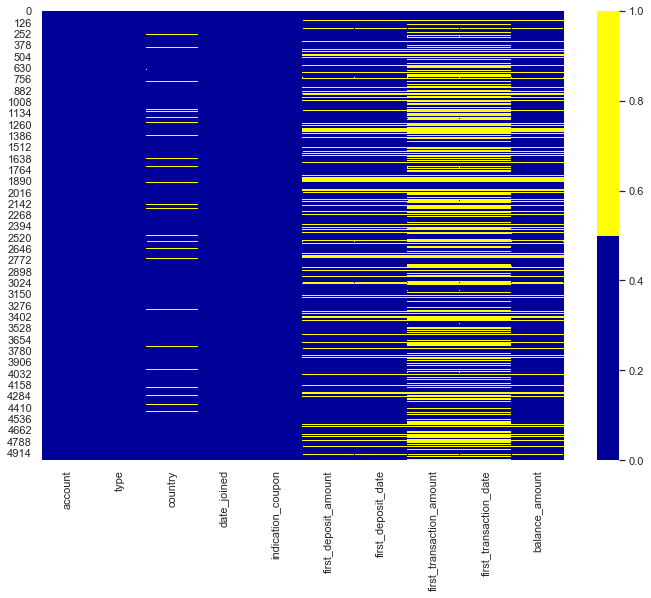

In [10]:
#clients
# remove the data that is useless
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(clients.isnull(), cmap=sns.color_palette(colours))

As we can see, 6 different columns contain Null values. first of all, it seems that some accounts do not belong to any country. but we have seen that in the campaign table, there were some campaigns without any country name and they are categorized as global campaigns. so, it is logical to categorise those accounts without country name as global. then when investigating other null values we understood that they are necessary to be left omitted because this lack of info will be used in next sections.

In [11]:
#replace the Nan values with 'global'
clients['country'] = clients['country'].fillna('global')
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
account                     5000 non-null int64
type                        5000 non-null object
country                     5000 non-null object
date_joined                 5000 non-null datetime64[ns]
indication_coupon           5000 non-null int64
first_deposit_amount        3959 non-null float64
first_deposit_date          3964 non-null datetime64[ns]
first_transaction_amount    2606 non-null float64
first_transaction_date      2608 non-null datetime64[ns]
balance_amount              3964 non-null float64
dtypes: datetime64[ns](3), float64(3), int64(2), object(2)
memory usage: 390.7+ KB


### 3.2.2 transactions' missed values

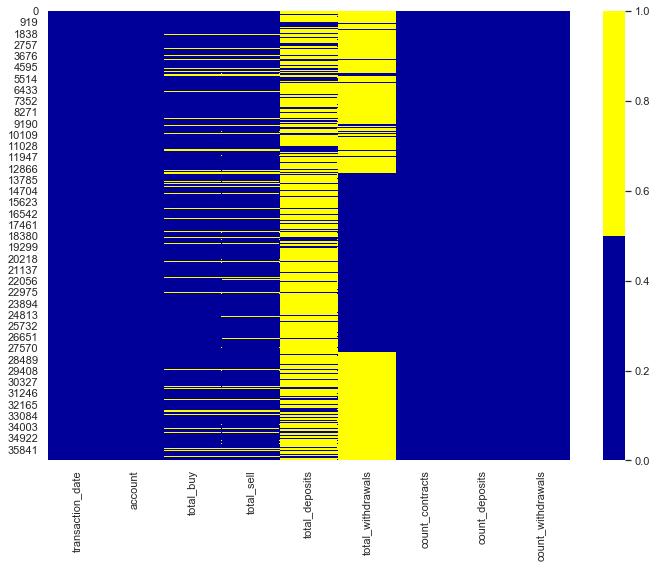

In [12]:
#transactions
# remove the data that is useless
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(transactions.isnull(), cmap=sns.color_palette(colours))

rows which have no information about buy, sell, deposit and withdrawal is useless. so they will be removed

In [13]:
#transactions
#delete rows which have no data in total buy, sell, deposit and withdrawals
for i in transactions.index:
    if (transactions['total_buy'].isnull()[i] == True) & (transactions['total_sell'].isnull()[i] == True) & (transactions['total_deposits'].isnull()[i] == True) & (transactions['total_withdrawals'].isnull()[i] == True):
        transactions.drop([i], axis = 0, inplace = True)

#delete transactions related to accounts which had no country names
#transactions_no_country = transactions[transactions['account'].isin(clients_no_country['account'])]
#for index in transactions_no_country.index:
#    transactions.drop([index], axis = 0, inplace = True)

transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36426 entries, 0 to 36746
Data columns (total 9 columns):
transaction_date     36426 non-null datetime64[ns]
account              36426 non-null int64
total_buy            33169 non-null float64
total_sell           32921 non-null float64
total_deposits       8242 non-null float64
total_withdrawals    16685 non-null float64
count_contracts      36426 non-null int64
count_deposits       36426 non-null int64
count_withdrawals    36426 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 4.0 MB


### 3.2.3 campaigns' missed values

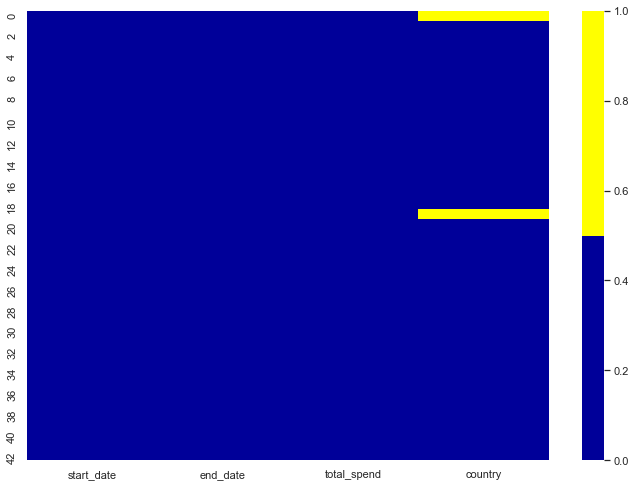

In [14]:
#campaigns
# remove the data that is useless
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(campaigns.isnull(), cmap=sns.color_palette(colours))

In [15]:
#replace the Nan values with 'global'
campaigns['country'] = campaigns['country'].fillna('global')
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
start_date     43 non-null datetime64[ns]
end_date       43 non-null datetime64[ns]
total_spend    43 non-null float64
country        43 non-null object
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.4+ KB


# 4. Exploratory Data Analysis

in this section, we firstly categorise our data into our three well-known tables. then, based on characteristics of each table, we conduct som descriptive analysis to broaden our knowledge about our data and reach to some conclusions about our dataset.

## 4.1. clients table

At first, we query the table and generate three tables, namely clients_just_joined, clients_with_deposit and clients_normal.

with the first table(clients_just_joined), we aim to find customers who have just created an account and never decided to buy and sell on the site. they did not even make a deposit to show they are serious. so, they are just passive users in site.

The second group (clients_with_deposit) seems to be more serious than the first one as they have paid the deposit. but unfortunately, like the first group, they did not participate actively in buying and selling. they maybe joined the site due to some advertisements during the campaigns and then gave up becoming an active user. so, to better understand the data, they are categorised as a separate group.

And finally, customers who buy and sell in site are separated to investigate more about them as they are the one who make profit.

In [16]:
#clients
#some useful information
# find those costumers who have just opened an account
clients_just_joined = pysqldf('SELECT * FROM clients WHERE first_deposit_amount is NULL and first_transaction_amount is NULL')

#another group has opened an account and gave a deposit, which is an step further
clients_with_deposit = pysqldf('SELECT * FROM clients WHERE first_deposit_amount is not NULL and first_transaction_amount is NULL')

# a table with clients that had transactions
clients_normal = pysqldf('SELECT * FROM clients WHERE first_deposit_amount is not NULL and first_transaction_amount is not NULL')

### 4.1.1 Type

At first, we decided to group each table based on the type of customers and then merge them to make a comparison

In [17]:
#grouping these just joined customers based on type
clients_j_type = pysqldf('SELECT type, COUNT(1) as total_just_joined FROM clients_just_joined GROUP BY type ORDER BY 2 DESC')

#grouping these customers with only deposits based on type
clients_w_type = pysqldf('SELECT type, COUNT(1) as total_with_deposit FROM clients_with_deposit GROUP BY type ORDER BY 2 DESC ')

#grouping normal customers based on type
clients_n_type = pysqldf('SELECT type, COUNT(1) as total_normal FROM clients_normal GROUP BY type ORDER BY 2 DESC ')

#categorised clients based on type
clients_type = pysqldf('SELECT type, count(1) total_total FROM clients group by 1 order by 2 desc')

#merging tables for comparison
clients_type_merged = clients_type.merge(clients_j_type, left_on='type', right_on='type').merge(clients_w_type, left_on='type', right_on='type').merge(clients_n_type, left_on='type', right_on='type')
clients_type_merged

,type,total_total,total_just_joined,total_with_deposit,total_normal
0,type_6,3238,1,1271,1966
1,type_1,1630,969,63,598
2,type_3,50,31,5,14
3,type_2,35,21,3,11
4,type_4,32,13,6,13


it can be seen that the majority of customers belong to the type_6 and more than half of them are buying and selling in the site and only 1 of the customers in this group has never made an deposit.but the most fascinating information gained is that  around two third of customers who were categorised as type 1 are just joined the site and never start buying or selling.

In [18]:
clients[clients['type'] == 'type_0']

,account,type,country,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
660,1000,type_0,eg,2017-10-13,241,NaN,NaT,NaN,NaT,NaN


In [19]:
clients[clients['type'] == 'type_5']

,account,type,country,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
163,2750,type_5,dz,2017-04-04,308,NaN,2017-04-04,NaN,NaT,0.0
721,2749,type_5,id,2017-04-03,308,NaN,2017-04-03,NaN,NaT,0.0
1361,2751,type_5,ax,2017-05-03,308,NaN,2017-05-03,NaN,NaT,0.0
2765,2752,type_5,zw,2017-08-28,308,NaN,2017-08-28,NaN,NaT,0.0
4917,2748,type_5,sg,2017-01-12,308,NaN,2017-01-12,NaN,NaT,0.0


In [20]:
clients[clients['type'] == 'type_7']

,account,type,country,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
138,5999,type_7,jp,2018-04-09,308,100000.0,2018-04-09,4347.826087,2018-04-09,100677.27
618,5994,type_7,jp,2017-11-07,308,100000.0,2017-11-07,NaN,NaT,100000.00
1614,5998,type_7,jp,2018-03-26,308,100000.0,2018-03-26,6887.185000,2018-03-26,97106.63
2813,5995,type_7,jp,2017-12-05,308,100000.0,2017-12-05,NaN,NaT,100000.00
3897,5993,type_7,jp,2017-06-30,308,100000.0,2017-06-30,NaN,NaT,100000.00
4250,5996,type_7,jp,2017-12-19,308,100000.0,2017-12-19,NaN,NaT,100000.00
4559,5991,type_7,jp,2017-01-06,308,100000.0,2017-01-06,5514.210000,2017-01-06,101539.22
4685,5997,type_7,jp,2018-02-01,308,100000.0,2018-02-01,NaN,NaT,100000.00
4982,5992,type_7,jp,2017-05-29,308,100000.0,2017-05-29,1401.723636,2017-05-29,86260.42


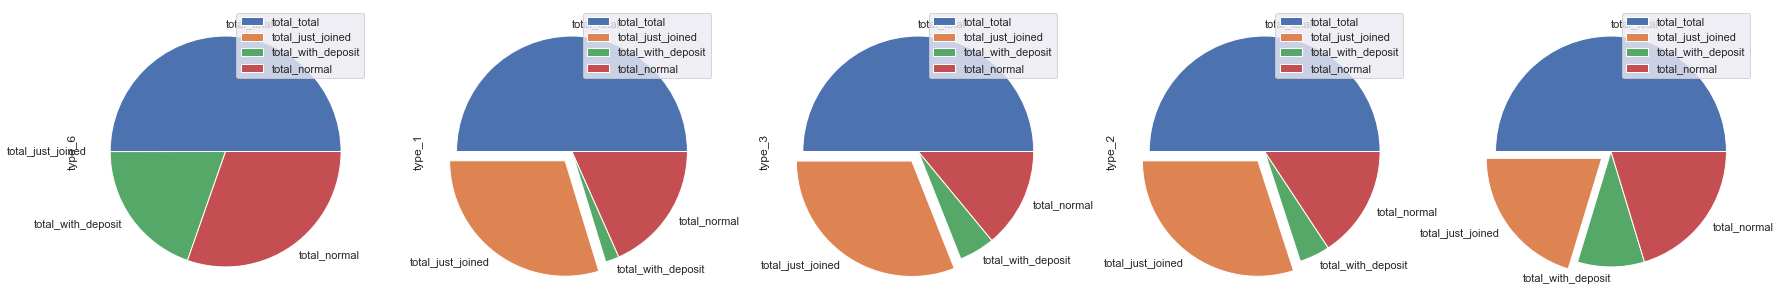

In [21]:
df_merged_2 = clients_type_merged.set_index(['type'])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice
df_merged_2.T.plot.pie(subplots=True, figsize=(30, 30), explode = explode)
plt.title("")
plt.ylabel("")
plt.show()

### 4.1.2. Country

In [23]:
#grouping these just joined customers based on country
clients_j_country = pysqldf('SELECT country, COUNT(*) as total_just_joined FROM clients_just_joined GROUP BY country ORDER BY 2 DESC ')

#grouping customers with only deposit based on country
clients_w_country = pysqldf('SELECT country, COUNT(*) as total_with_deposit FROM clients_with_deposit GROUP BY country ORDER BY 2 DESC ')

#grouping normal customers based on country
clients_n_country = pysqldf('SELECT country, COUNT(*) as total_normal FROM clients_normal GROUP BY country ORDER BY 2 DESC ')

#categorised clients based on country
clients_country = pysqldf('SELECT country, count(*) total FROM clients group by 1 order by 2 desc')

#merging tables for comparison and showing top 10 countries
clients_country_merged = clients_country.merge(clients_j_country, left_on='country', right_on='country').merge(clients_w_country, left_on='country', right_on='country').merge(clients_n_country, left_on='country', right_on='country').head(10)
clients_country_merged

,country,total,total_just_joined,total_with_deposit,total_normal
0,id,1667,340,379,948
1,br,438,86,105,247
2,ng,284,80,75,129
3,ru,274,37,53,184
4,vn,170,47,35,88
5,in,141,36,39,66
6,gb,134,18,44,72
7,za,105,29,32,44
8,lk,97,20,10,67
9,ua,77,13,24,40


the country "id" is the home of almost a third of our customers. more than half ofcustomers living in "id" actively buy and sell products and make a great portion of site's income. the second most popular country is "br" with 438 customers, which is far less than 1667 "id" customers. then there are "ng" and "ru" in the third and fourth place respectively.

C:\Users\Sahand\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


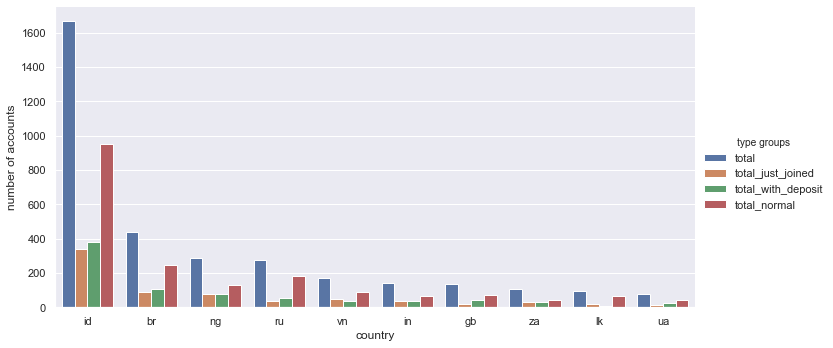

In [24]:

df_merged = pd.melt(clients_country_merged, id_vars="country", var_name="type groups", value_name="number of accounts")

sns.factorplot(x='country', y="number of accounts", hue='type groups', data=df_merged, kind='bar', aspect=20/10)


 ### 4.1.3 Coupon indicator

In [25]:
clients_j_coupon = pysqldf('SELECT indication_coupon, COUNT(*) as total_just_joined FROM clients_just_joined GROUP BY indication_coupon ORDER BY 2 DESC ')

clients_w_coupon = pysqldf('SELECT indication_coupon, COUNT(*) as total_with_deposit FROM clients_with_deposit GROUP BY indication_coupon ORDER BY 2 DESC ')

clients_n_coupon = pysqldf('SELECT indication_coupon, COUNT(*) as total_normal FROM clients_normal GROUP BY indication_coupon ORDER BY 2 DESC ').head(7)

clients_coupon = pysqldf('SELECT indication_coupon, count(*) total FROM clients group by 1 order by 2 desc')

clients_coupon.merge(clients_j_coupon, left_on='indication_coupon', right_on='indication_coupon').merge(clients_w_coupon, left_on='indication_coupon', right_on='indication_coupon').merge(clients_n_coupon, left_on='indication_coupon', right_on='indication_coupon').head(10)

,indication_coupon,total,total_just_joined,total_with_deposit,total_normal
0,308,4229,825,1194,2210
1,41,61,19,12,30
2,116,48,26,11,11
3,36,20,5,2,13
4,181,18,8,1,9
5,48,14,3,3,8


coupon number 308 is by far the most valuable coupon.

## 4.2. transactions

the main goal of all these tables is to calculate and boost up the profit. and the profit has a direct relationship with total amount of buy and sell (1% of the total). so, in the first step, we sum up total expenditures in the site over the past two years. then these numbers will be categorised based on year and finally season. we can also see the total number of contracts made and total number of deposits as well as withdrawals.

In [26]:
#transactions
#total expenditure during the years 2017 and 2018
transactions_expenditures = pysqldf('SELECT SUM(total_buy) sum_total_buy, SUM(total_sell) sum_total_sell, SUM(total_deposits) sum_total_deposits, SUM(total_withdrawals) total_withdrawals FROM transactions ')

#categorised based on years
transactions_total_expenditure = pysqldf("SELECT CAST(transaction_date as datetime) as years, SUM(total_buy) sum_total_buy, SUM(total_sell) sum_total_sell, SUM(total_deposits) sum_total_deposits, SUM(total_withdrawals) sum_total_withdrawals FROM transactions GROUP BY 1")

#concatinate tables
overall_tr_ex = pd.concat([transactions_total_expenditure,transactions_expenditures])
overall_tr_ex = overall_tr_ex.reset_index(drop = True)
overall_tr_ex.loc[2,'years'] = 'Total'
overall_tr_ex = overall_tr_ex[['years','sum_total_buy','sum_total_deposits','sum_total_sell','sum_total_withdrawals']]
overall_tr_ex = overall_tr_ex.style.format({'sum_total_buy' : "{:,.0f}",'sum_total_sell' : "{:,.0f}" ,'sum_total_deposits' : "{:,.0f}",'sum_total_withdrawals' : "{:,.0f}"})
overall_tr_ex

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,years,sum_total_buy,sum_total_deposits,sum_total_sell,sum_total_withdrawals
0,2017,"30,503,986","22,915,212","23,883,429","946,791,604"
1,2018,"46,685,312","33,632,648","35,630,821","525,012,866"
2,Total,"77,189,298","56,547,860","59,514,249",nan


in 2018, total amount of buy, sell and deposits has been increased considerably in comparison to the 2017. even the total amount of withdrawals have declined and almost reached to its have just over a year. it shows that in 2018, customers were more likely to keep their money in site rather than making a withdrawals, which is a plus sign for site.

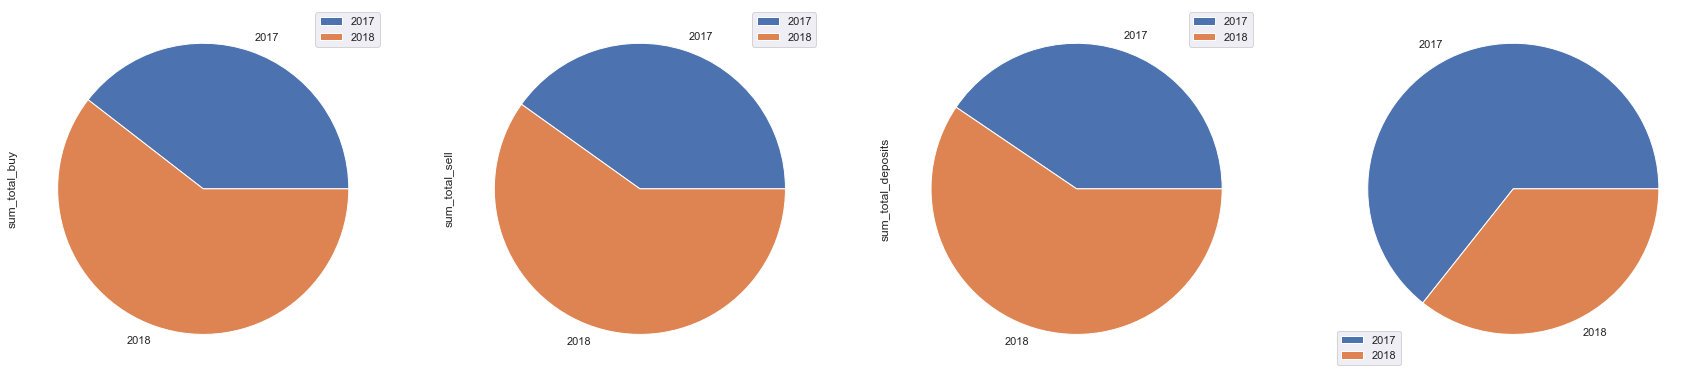

In [27]:
df_t = transactions_total_expenditure.set_index(['years'])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice
df_t.plot.pie(subplots=True, figsize=(30, 10))
plt.title("")
plt.ylabel("")
plt.show()

In [28]:
#total number of contrancts, deposits and withdrawals
transactions_counts = pysqldf('SELECT SUM(count_contracts) sum_count_contracts, SUM(count_deposits) sum_count_deposits, SUM(count_withdrawals) sum_count_withdrawals FROM transactions ')

#categorised based on years
transactions_counts_y = pysqldf("SELECT CAST(transaction_date as datetime) as years, SUM(count_contracts) sum_count_contracts, SUM(count_deposits) sum_count_deposits, SUM(count_withdrawals) sum_count_withdrawals FROM transactions GROUP BY 1")

#concatinate tables
overall_tr_co = pd.concat([transactions_counts_y,transactions_counts])
overall_tr_co = overall_tr_co.reset_index(drop = True)
overall_tr_co.loc[2,'years'] = 'Total'
overall_tr_co = overall_tr_co[['years','sum_count_contracts','sum_count_deposits','sum_count_withdrawals']]
overall_tr_co = overall_tr_co.style.format({'sum_count_contracts' : "{:,.0f}" ,'sum_count_deposits' : "{:,.0f}",'sum_count_withdrawals' : "{:,.0f}"})
overall_tr_co

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,years,sum_count_contracts,sum_count_deposits,sum_count_withdrawals
0,2017,"6,524,113","4,299",956
1,2018,"2,882,585","6,455","2,162"
2,Total,"9,406,698","10,754","3,118"


by looking at table above, it is clear that while total amount of buy and sell have been risen during the year 2018, total number of contracts in this year is less than half of its figure in 2017. this shows that although less contract have been made, customers have spent more money on each one, which can be becauses of campaigns. 

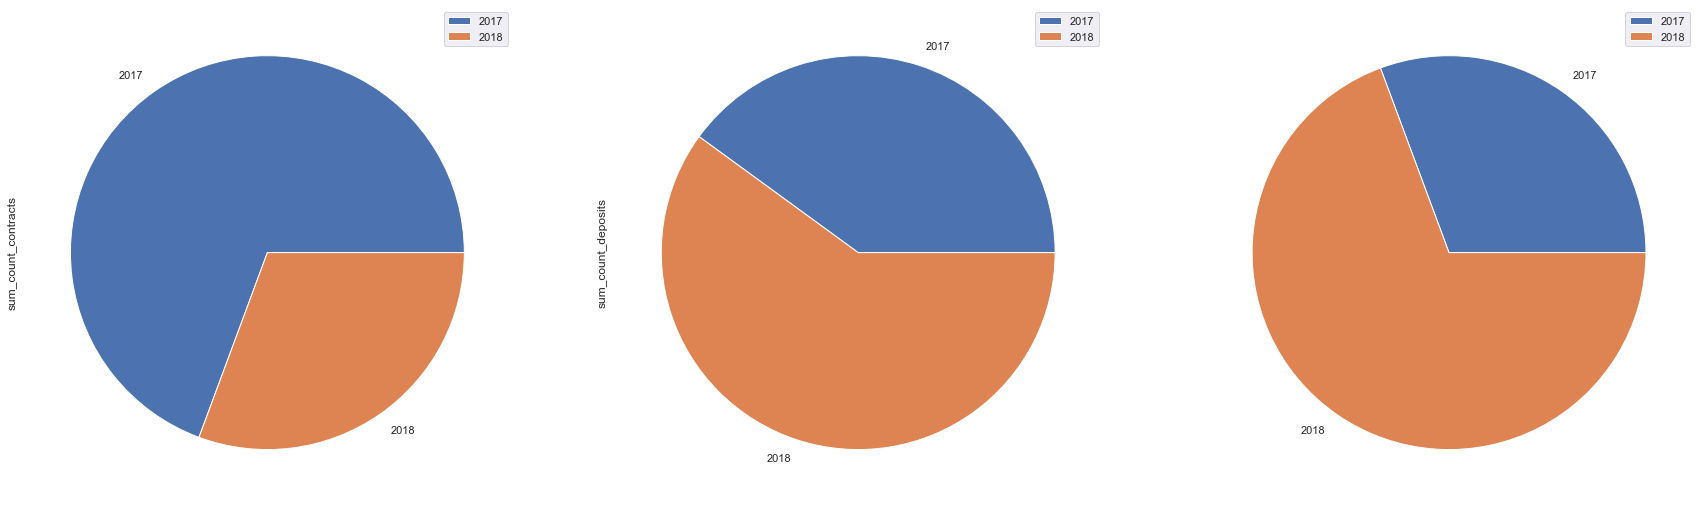

In [30]:
df_c = transactions_counts_y.set_index(['years'])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice
df_c.plot.pie(subplots=True, figsize=(30, 10))
plt.title("")
plt.ylabel("")
plt.show()

the number of contracts has been decreased over the year 2018 but total amount of buy and sell has been increased. this shows that in 2018, the average amount of each contract saw a sharp rise.


In [31]:
import datetime
transactions_year_season = transactions
for index, row in transactions_year_season.iterrows():

    if row['transaction_date'] < pd.Timestamp(datetime.datetime(2017, 4, 1)):
        transactions_year_season.loc[index,'year_season'] = '2017-  winter'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2017, 7, 1)):
        transactions_year_season.loc[index,'year_season'] = '2017- spring'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2017, 10, 1)):
        transactions_year_season.loc[index,'year_season'] = '2017- summer'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2018, 1, 1)):
        transactions_year_season.loc[index,'year_season'] = '2017-autumn'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2018, 4, 1)):
        transactions_year_season.loc[index,'year_season'] = '2018-  winter'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2018, 7, 1)):
        transactions_year_season.loc[index,'year_season'] = '2018- spring'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2018, 10, 1)):
        transactions_year_season.loc[index,'year_season'] = '2018- summer'
    elif row['transaction_date'] < pd.Timestamp(datetime.datetime(2019, 1, 1)):
        transactions_year_season.loc[index,'year_season'] = '2018-autumn'

In [32]:
transactions_year_season_g = transactions_year_season.groupby(['year_season']).sum().drop(['account'], axis = 1)
transactions_year_season_g.style.format("{:,.0f}")

,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
year_season,,,,,,,
2017- winter,"4,116,740","3,155,187","4,590,144","135,733,583","207,739",792,121
2017- spring,"4,254,767","3,251,559","4,821,667","228,482,330","336,049","1,042",219
2017- summer,"8,764,718","6,763,547","5,515,405","276,038,424","460,212","1,070",248
2017-autumn,"13,367,762","10,713,136","7,987,997","306,537,267","5,520,113","1,395",368
2018- winter,"13,728,908","10,496,727","8,572,915","190,895,177","663,059","1,391",355
2018- spring,"10,098,762","7,646,455","8,656,570","144,775,188","678,101","1,579",395
2018- summer,"11,071,387","8,436,031","9,360,418","110,505,890","891,800","1,962",763
2018-autumn,"11,786,255","9,051,607","7,042,744","78,836,611","649,625","1,523",649


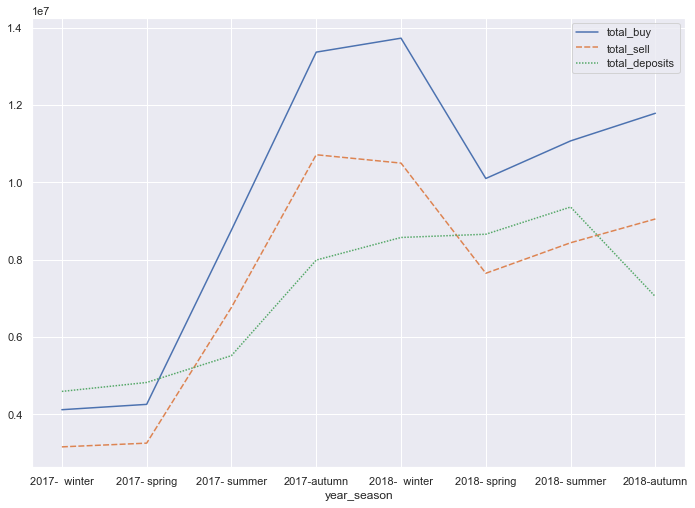

In [33]:
ax = sns.lineplot(data = transactions_year_season_g[['total_buy','total_sell','total_deposits']])

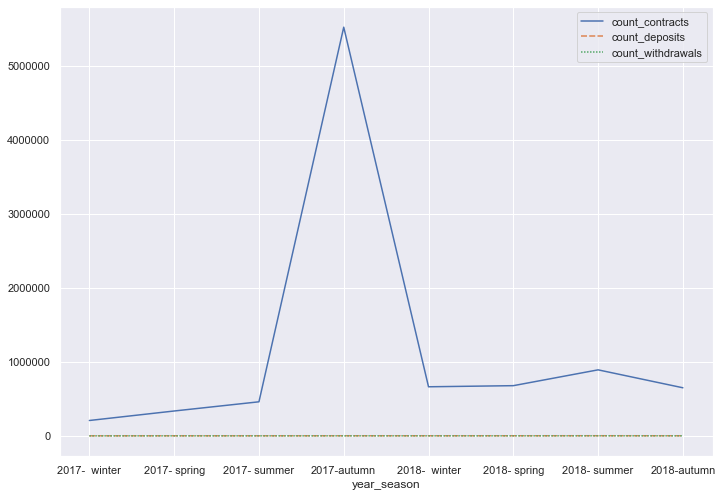

In [34]:
ax1 = sns.lineplot(data = transactions_year_season_g[['count_contracts','count_deposits','count_withdrawals']])

## 4.3. campaigns

in this section, we have calculated the total campaign expenditures and number of campaigns in each country,

In [35]:
#campaigns
#total campaign expenditure
campaigns_total = pysqldf('SELECT SUM(total_spend) total_spent FROM campaigns')
#campaign expenditures in each year
campaigns_total_y =  pysqldf("SELECT CAST(start_date as datetime) as years, sum(total_spend) total_spent FROM campaigns GROUP BY 1 ORDER BY 2 DESC")

#concatinate tables
overall_camp = pd.concat([campaigns_total_y,campaigns_total])
overall_camp = overall_camp.reset_index(drop = True)
overall_camp.loc[2,'years'] = 'Total'
overall_camp = overall_camp[['years','total_spent']]
overall_camp = overall_camp.style.format({'total_spent' : "{:,.0f}" })
overall_camp




C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,years,total_spent
0,2017,"320,444"
1,2018,"195,765"
2,Total,"516,209"


In [36]:
    
print('-------------------')
print(' number of campaigns in each country:\n', campaigns['country'].value_counts(dropna = False).to_frame())
print('-------------------')


-------------------
 number of campaigns in each country:
         country
id           14
br            4
ng            4
ru            3
global        2
gh            2
ua            2
ca            1
co            1
ie            1
ph            1
za            1
gb            1
in            1
de            1
it            1
ma            1
py            1
mg            1
-------------------


In [37]:
campaigns_year_season = campaigns
for index, row in campaigns_year_season.iterrows():

    if row['end_date'] < pd.Timestamp(datetime.datetime(2017, 4, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2017-  winter'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2017, 7, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2017- spring'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2017, 10, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2017- summer'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2018, 1, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2017-autumn'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2018, 4, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2018-  winter'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2018, 7, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2018- spring'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2018, 10, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2018- summer'
    elif row['end_date'] < pd.Timestamp(datetime.datetime(2019, 1, 1)):
        campaigns_year_season.loc[index,'year_season'] = '2018-autumn'

In [38]:
campaigns_year_season_g = campaigns_year_season.groupby(['year_season']).sum()
campaigns_year_season_g.style.format("{:,.0f}")

,total_spend
year_season,
2017- winter,"50,919"
2017- spring,"57,738"
2017- summer,"138,164"
2017-autumn,"73,623"
2018- winter,"85,871"
2018- spring,"71,953"
2018- summer,"16,662"
2018-autumn,"21,279"


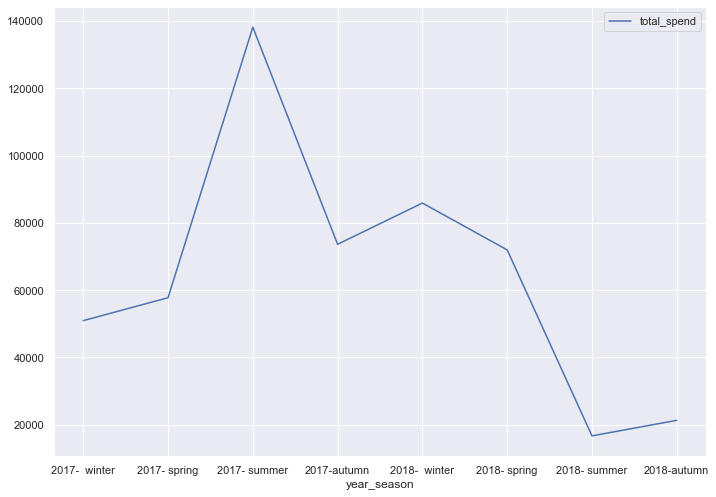

In [42]:
ax2 = sns.lineplot(data = campaigns_year_season_g)

total campaign expenditure is decreased in 2018 but our toal sell and buy saw a rapid rise over this period

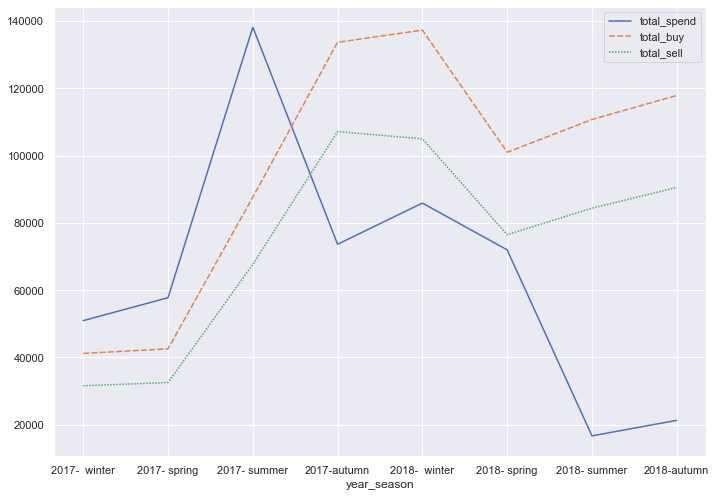

In [43]:
camp_tr_merged_season = campaigns_year_season_g.merge(transactions_year_season_g[['total_buy','total_sell']], left_on = 'year_season', right_on = 'year_season')
camp_tr_merged_season[['total_buy','total_sell']] = camp_tr_merged_season[['total_buy','total_sell']] / 100
ax3 = sns.lineplot(data = camp_tr_merged_season)
# total buy and sell are divided to 100 to compare the profit gained in each season 

# 5. More advanced analysis

After analysing each table separately, now we want to merge tables to see how we can analyse better. at first each campaign is enumerated. then a merged table of clients and transactions is queried to gain more insight on each transaction. after that, we try to investigate which transactions happen during the campaign time. in this wat the performance of campaigns can be analysed. then, there is a hypothesis saying that if an account join the site or have an transaction during a campaign, the next transactions are considered to be related to that campaign. so we categorise them as campaign_number_after in a separate column to investigate the performance of each campaign. in the end we can exactly see which campaigns had more great impact on our transactions during the past two years.

## 5.1. categorising transactions related to each campaign based on transaction_date

### 5.1.1. allocating a number to each campaign

In [46]:
# add number to each campaign to categorise them later
campaigns.reset_index(inplace = True)
campaigns['campaign_number'] = ''
for i in range(1,len(campaigns)+1):
    campaigns.loc[i-1,'campaign_number'] = i
    
campaigns.drop(['index'], axis = 1, inplace = True)
campaigns

,start_date,end_date,total_spend,country,year_season,campaign_number
0,2017-01-03,2017-01-04,9935.67,global,2017- winter,1
1,2017-01-04,2017-01-06,17696.41,id,2017- winter,2
2,2017-01-08,2017-01-12,22541.26,in,2017- winter,3
3,2017-02-13,2017-02-18,745.89,ng,2017- winter,4
4,2017-05-02,2017-05-03,15338.78,id,2017- spring,5
5,2017-05-20,2017-05-23,7976.25,gh,2017- spring,6
6,2017-05-25,2017-05-28,7102.54,ru,2017- spring,7
7,2017-06-20,2017-06-20,14269.43,id,2017- spring,8
8,2017-06-26,2017-06-30,3140.96,ru,2017- spring,9
9,2017-06-28,2017-06-28,9909.73,ua,2017- spring,10


### 5.1.2 creating a new table consist of clients and transactions

In [47]:
#query a new table to categorise each transaction

joined_tr_cl = pysqldf(' SELECT t.transaction_date, t.account, c.type, c.country, c.indication_coupon, t.total_buy, t.total_sell, t.total_deposits, t.total_withdrawals, t.count_contracts  FROM transactions t JOIN clients c ON c.account = t.account')
joined_tr_cl['transaction_date'] = pd.to_datetime(joined_tr_cl['transaction_date'], format="%Y-%m-%d")
print(joined_tr_cl.info())
joined_tr_cl.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36426 entries, 0 to 36425
Data columns (total 10 columns):
transaction_date     36426 non-null datetime64[ns]
account              36426 non-null int64
type                 36426 non-null object
country              36426 non-null object
indication_coupon    36426 non-null int64
total_buy            33169 non-null float64
total_sell           32921 non-null float64
total_deposits       8242 non-null float64
total_withdrawals    16685 non-null float64
count_contracts      36426 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 2.8+ MB
None


,transaction_date,account,type,country,indication_coupon,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts
0,2018-05-25,1093,type_1,ru,13,NaN,NaN,NaN,3.15,0
1,2017-03-18,1093,type_1,ru,13,7.50,6.50,100.0,NaN,72
2,2017-03-17,1093,type_1,ru,13,48.63,38.51,1000.0,NaN,93
3,2018-12-10,2622,type_1,ng,308,36.29,32.99,NaN,NaN,44
4,2018-12-09,2622,type_1,ng,308,101.19,102.56,NaN,NaN,76


### 5.1.3 which campaign, which transaction

try to see which transactions and how many of them have happened during the campaign time

In [122]:
# categorised campaigns in each transactions
# hyphothesis: customers who have bought products, sold products or create an account during the campaign time are due to the campaign  
joined_tr_cl['campaign_number'] = 0
for campaign in campaigns.index:
    start_date = campaigns.loc[campaign,'start_date']
    end_date = campaigns.loc[campaign,'end_date']
    country = campaigns.loc[campaign, 'country']
    campaign_number = campaigns.loc[campaign, 'campaign_number']
    
    mask = (joined_tr_cl['transaction_date']>= start_date) & (joined_tr_cl['transaction_date'] <= end_date) & (joined_tr_cl['country'] == country)
    for i in joined_tr_cl[mask].index:
        joined_tr_cl.loc[i,'campaign_number'] = campaign_number

num_of_tr_during_each_camp = joined_tr_cl['campaign_number'].value_counts().to_frame()
num_of_tr_during_each_camp = num_of_tr_during_each_camp.rename(columns={'campaign_number': "number_of_transactions"})
num_of_tr_during_each_camp.index.name = 'campaign_number'
num_of_tr_during_each_camp.head()

,number_of_transactions
campaign_number,
0,35284
26,136
33,119
16,110
27,94


### 5.1.4. grouped campaigns

to gain a more broader view, we group campaign which have a campaign number based on total buy and sell. then create a new table consist of campaign information and then sort all of them based on total buy.

as we can see below,campaign number 33 located in "id" had the greatest effect on total amount of buy and sell in our table. other campaigns are sorted as well.

In [51]:
#rename the table column
num_of_tr_during_each_camp.rename(columns = {'campaign_number' : 'number_of_transactions_during_each_campaign'}, inplace = True)

#selection
joined_tr_cl_g = joined_tr_cl[['campaign_number','total_buy', 'total_sell']].groupby(['campaign_number']).sum().sort_values(['total_buy'],ascending=False)
joined_tr_cl_g_during = joined_tr_cl_g.merge(campaigns, left_on='campaign_number', right_on='campaign_number').drop(['start_date','end_date'], axis=1).merge(num_of_tr_during_each_camp, left_on = 'campaign_number', right_on = num_of_tr_during_each_camp.index)
joined_tr_cl_g_during

,campaign_number,total_buy,total_sell,total_spend,country,year_season,number_of_transactions_during_each_campaign
0,33,528492.57,422144.20,9192.02,id,2018- winter,119
1,16,523279.94,408732.33,13731.69,id,2017- summer,110
2,26,384651.70,294318.64,15020.37,id,2017-autumn,136
3,27,311620.18,252865.05,5533.58,id,2018- winter,94
4,24,307850.18,240802.23,5491.55,id,2017-autumn,75
5,28,255082.71,199387.61,11466.04,id,2018- winter,54
6,32,231675.53,178235.27,12906.71,id,2018- winter,70
7,13,229420.45,174151.22,26143.24,id,2017- summer,87
8,41,196755.07,145537.21,1745.10,id,2018-autumn,70
9,34,161245.19,121779.60,19928.51,id,2018- spring,88


### 5.1.5. customers transactions after the campaigns

the hypothesis here is that if a customer join the club, the next transactions are indirectly related to that campaign. so, we firstly found out which accounts were active during the campaigns. then dedicate campaign number to transactions which have happened after the related campaign in a coulmn named campaign_number_after. in the end, the number of transactions happened after each campaign can be counted. 

In [52]:
#hypothesis: if customers, who are categorised in each campaign, buy or sell product after the campaign time, it is due to the campaign 
joined_tr_cl['campaign_number_after'] = 0
for campaign_number in range(1,44): #number of campaigns
    campaign_group = joined_tr_cl[joined_tr_cl['campaign_number'] == campaign_number]
    for acc in campaign_group.account:
        campaign_acc = joined_tr_cl[joined_tr_cl['account'] == acc]
        for i in campaign_acc.index:
            if campaign_acc.loc[i, 'transaction_date'] > campaign_group['transaction_date'].max():
                joined_tr_cl.loc[i,'campaign_number_after'] = campaign_number


num_of_tr_after_each_camp = joined_tr_cl['campaign_number_after'].value_counts().to_frame()
num_of_tr_after_each_camp = num_of_tr_after_each_camp.rename(columns={'campaign_number_after': "number_of_transactions"})
num_of_tr_after_each_camp.index.name = 'campaign_number_after'
num_of_tr_after_each_camp.head()

,campaign_number_after
0,26523
34,1411
33,923
16,914
26,848
41,833
28,630
13,560
17,441
27,410


### 5.1.6. grouped campaigns after 

In [53]:
# group the joined table based on campaign numbers after the campaigns
joined_tr_cl_g_after = joined_tr_cl[['campaign_number_after','total_buy', 'total_sell']].groupby(['campaign_number_after']).sum().sort_values(['total_buy'],ascending=False)

# create a new table to count transactions after campaigns
campaigns_transactions_value = pd.DataFrame(data= joined_tr_cl['campaign_number_after'].value_counts())
campaigns_transactions_value.reset_index(inplace = True)
campaigns_transactions_value.columns = ['campaign_number', 'num_of_tr_after_each_camp']


# merge to table above with campaigns table
joined_tr_cl_g_after = joined_tr_cl_g_after.merge(campaigns, left_on='campaign_number_after', right_on='campaign_number').drop(['start_date','end_date'], axis=1).merge(campaigns_transactions_value, left_on = 'campaign_number', right_on = 'campaign_number')
joined_tr_cl_g_after

,total_buy,total_sell,total_spend,country,year_season,campaign_number,num_of_tr_after_each_camp
0,4593704.61,3505996.17,13731.69,id,2017- summer,16,914
1,4065571.53,3175790.87,1745.10,id,2018-autumn,41,833
2,3599739.68,2803737.65,15020.37,id,2017-autumn,26,848
3,3332225.57,2481085.35,9192.02,id,2018- winter,33,923
4,2911009.74,2229592.37,11466.04,id,2018- winter,28,630
5,2907832.81,2254291.41,26143.24,id,2017- summer,13,560
6,1736151.30,1308946.45,19928.51,id,2018- spring,34,1411
7,1431323.14,1095744.93,12906.71,id,2018- winter,32,326
8,1116435.49,864791.30,15338.78,id,2017- spring,5,350
9,762247.54,554428.61,11581.60,ng,2018- spring,36,143


### 5.1.7 results

5.1.7.1. number of transactions happened during campaigns in each country

In [70]:
#number of transactions happened during campaigns in each country
joined_tr_cl_categorised_d = joined_tr_cl[joined_tr_cl['campaign_number']> 0]
joined_tr_cl_categorised_during = joined_tr_cl_categorised_d[['country','transaction_date']].groupby(['country']).count().sort_values(['transaction_date'], ascending = False)

joined_tr_cl_categorised_during = joined_tr_cl_categorised_during.rename(columns = {'transaction_date':'number_of_tr_during_each_camp'})

#number of transactions happened after  campaigns in each country
joined_tr_cl_categorised_a = joined_tr_cl[joined_tr_cl['campaign_number_after']> 0]
joined_tr_cl_categorised_after = joined_tr_cl_categorised_a[['country','transaction_date']].groupby(['country']).count().sort_values(['transaction_date'], ascending = False)
joined_tr_cl_categorised_after = joined_tr_cl_categorised_after.rename(columns = {'transaction_date':'number_of_tr_after_each_camp'})

joined_tr_cl_categorised = joined_tr_cl_categorised_during.merge(joined_tr_cl_categorised_after, left_on='country', right_on = 'country')

joined_tr_cl_categorised

,number_of_tr_during_each_camp,number_of_tr_after_each_camp
country,,
id,950,7553
br,86,751
ru,53,1194
ng,37,228
gh,4,34
in,4,8
it,3,1
ca,2,1
de,2,130


In [119]:
joined_tr_cl_categorised_during_s = joined_tr_cl_categorised_d[['country', 'total_buy', 'total_sell']].groupby(['country']).sum().sort_values(['total_buy'], ascending = False)
joined_tr_cl_categorised_during_s = joined_tr_cl_categorised_during_s.rename(columns = {'total_buy' : 'total_buy_during_campaigns', 'total_sell': 'total_sell_during_campaigns'} )


joined_tr_cl_categorised_after_s = joined_tr_cl_categorised_a[['country', 'total_buy','total_sell']].groupby(['country']).sum().sort_values(['total_buy'], ascending = False)
joined_tr_cl_categorised_after_s = joined_tr_cl_categorised_after_s.rename(columns = {'total_buy' : 'total_buy_after_campaigns', 'total_sell': 'total_sell_after_campaigns'})


joined_tr_cl_categorised_d_and_a = joined_tr_cl_categorised_during_s.merge(joined_tr_cl_categorised_after_s, left_on='country', right_on = 'country')
joined_tr_cl_categorised_d_and_a.style.format("{:,.0f}")

,total_buy_during_campaigns,total_sell_during_campaigns,total_buy_after_campaigns,total_sell_after_campaigns
country,,,,
id,"3,247,325","2,523,096","27,109,548","20,764,635"
ng,"84,397","62,383","1,051,537","777,284"
br,"65,649","50,183","514,268","387,023"
ru,"38,040","29,115","116,873","83,798"
it,"14,283","11,416",0,0
ca,"4,942","3,074",76,61
gh,"1,081","1,043","28,352","23,694"
in,165,136,873,671
gb,40,16,562,497


In [96]:
joined_tr_cl_no_campaign = joined_tr_cl[joined_tr_cl['campaign_number_after'] == 0 ]
joined_tr_cl_no_campaign = joined_tr_cl_no_campaign[['type', 'country', 'total_buy','total_sell','total_deposits']].groupby(['country']).sum().sort_values(['total_buy'], ascending = False)
joined_tr_cl_no_campaign = joined_tr_cl_no_campaign.rename(columns = {'total_buy' : 'total_buy_no_campaign', 'total_sell':'total_sell_no_campaign','total_deposits': 'total_deposits_no_campaign'})
joined_tr_cl_no_campaign.style.format("{:,.0f}")
# compare and see which countries desereve more campaign

,total_buy_no_campaign,total_sell_no_campaign,total_deposits_no_campaign
country,,,
id,"21,232,474","16,319,758","17,971,689"
ng,"2,588,713","1,968,110","2,188,746"
br,"2,560,632","1,948,239","3,892,405"
gb,"2,440,336","2,042,439","1,426,883"
vn,"2,234,566","1,666,407","1,888,413"
ru,"2,115,443","1,637,853","2,288,072"
gh,"1,952,344","1,548,179","551,262"
pk,"1,370,744","1,047,842","584,019"
it,"1,174,274","977,821","512,217"


In [80]:
#total buy and sell based on countries without considering any campaign
grouped_joined_tr_cl = joined_tr_cl[['type', 'country', 'total_buy','total_sell','total_deposits','total_withdrawals']].groupby(['country']).sum().sort_values(['total_buy'], ascending = False)
grouped_joined_tr_cl.head()

,total_buy,total_sell,total_deposits,total_withdrawals
country,,,,
id,48342021.31,37084392.98,25758830.60,7.230736e+08
ng,3640249.68,2745394.06,2617492.86,5.876367e+07
br,3074899.40,2335262.53,4112732.61,9.316202e+07
gb,2440897.59,2042935.89,1426883.17,2.122102e+07
vn,2234566.03,1666406.91,1888412.70,2.420365e+07


In [107]:
joined_all_comparison = grouped_joined_tr_cl.merge(joined_tr_cl_no_campaign, left_on= grouped_joined_tr_cl.index, right_on = joined_tr_cl_no_campaign.index )
joined_all_comparison = joined_all_comparison.drop([ 'total_withdrawals', ], axis = 1)
joined_all_comparison.head()

,key_0,total_buy,total_sell,total_deposits,total_buy_no_campaign,total_sell_no_campaign,total_deposits_no_campaign
0,id,48342021.31,37084392.98,25758830.60,21232473.61,16319757.86,17971689.43
1,ng,3640249.68,2745394.06,2617492.86,2588713.04,1968110.36,2188746.30
2,br,3074899.40,2335262.53,4112732.61,2560631.67,1948239.27,3892405.15
3,gb,2440897.59,2042935.89,1426883.17,2440335.76,2042438.88,1426883.17
4,vn,2234566.03,1666406.91,1888412.70,2234566.03,1666406.91,1888412.70


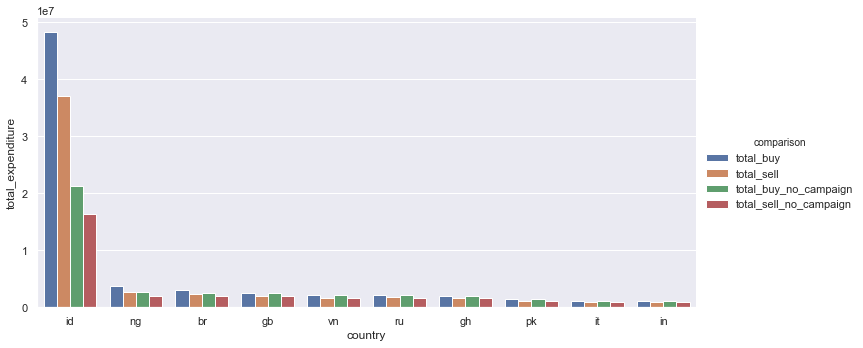

In [111]:
#joined_all_comparison = joined_all_comparison.drop(['total_deposits', 'total_deposits_no_campaign'], axis = 1 )
joined_all_comparison = joined_all_comparison.rename(columns = {'key_0': 'country'})
joined_all_comparison_head = joined_all_comparison.head(10)

df_comparison = pd.melt(joined_all_comparison_head, id_vars="country", var_name="comparison", value_name="total_expenditure")

sns.factorplot(x='country', y="total_expenditure", hue='comparison', data=df_comparison, kind='bar', aspect=20/10)


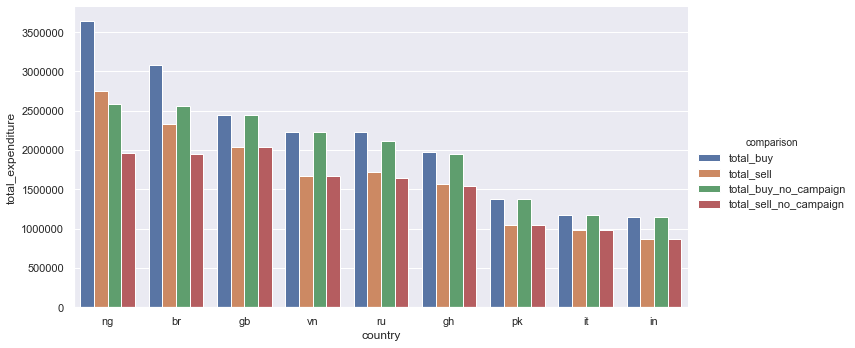

In [118]:
joined_all_comparison_head_no_id = joined_all_comparison_head.iloc[1:11,:]


df_comparison_no_id = pd.melt(joined_all_comparison_head_no_id, id_vars="country", var_name="comparison", value_name="total_expenditure")
sns.factorplot(x='country', y="total_expenditure", hue='comparison', data=df_comparison_no_id, kind='bar', aspect=20/10)

In [120]:
#total buy and sell during and after each campaign
#first, we sum up and group all total buy and sell during and after each campaign based on each country
joined_tr_cl_g_during_country = joined_tr_cl_g_during.groupby('country').sum().sort_values(['total_buy'],ascending = False)
joined_tr_cl_g_after_country = joined_tr_cl_g_after.groupby('country').sum().sort_values(['total_buy'],ascending = False)

#then we merge these two tables to figure out total buy and sell affected by campaigns whether directly or indirectly
joined_tr_cl_g_during_country['total_buy_during_and_after'] = joined_tr_cl_g_during_country['total_buy'] + joined_tr_cl_g_after_country['total_buy']
joined_tr_cl_g_during_country['total_sell_during_and_after'] = joined_tr_cl_g_during_country['total_sell'] + joined_tr_cl_g_after_country['total_sell']

#divide by 100 to compare profit earned by each campaign with total expenditure on that country
joined_tr_cl_g_during_country = joined_tr_cl_g_during_country.drop(['total_buy','total_sell','campaign_number','number_of_transactions_during_each_campaign'], axis = 1)
joined_tr_cl_g_during_country['total_buy_during_and_after'] = joined_tr_cl_g_during_country['total_buy_during_and_after'] /100
joined_tr_cl_g_during_country['total_sell_during_and_after'] = joined_tr_cl_g_during_country['total_sell_during_and_after'] /100
joined_tr_cl_g_during_country.style.format("{:,.0f}")


,total_spend,total_buy_during_and_after,total_sell_during_and_after
country,,,
id,"168,463","303,569","232,877"
ng,"35,351","11,359","8,397"
br,"47,229","5,799","4,372"
ru,"40,110","1,549","1,129"
it,"12,464",143,114
ca,"10,095",50,31
gh,"7,896",294,247
in,"22,541",10,8
gb,"16,954",6,5


In [59]:
#campaigns which had no effect at all
campaigns[~campaigns['campaign_number'].isin(num_of_tr_during_each_camp.index)]

,start_date,end_date,total_spend,country,year_season,campaign_number
0,2017-01-03,2017-01-04,9935.67,global,2017- winter,1
5,2017-05-20,2017-05-23,7976.25,gh,2017- spring,6
9,2017-06-28,2017-06-28,9909.73,ua,2017- spring,10
11,2017-07-26,2017-07-27,15395.67,co,2017- summer,12
18,2017-09-21,2017-09-21,2677.16,za,2017- summer,19
19,2017-09-23,2017-09-25,15065.68,global,2017- summer,20
22,2017-10-13,2017-10-15,12718.82,ie,2017-autumn,23
24,2017-11-24,2017-11-26,16456.49,id,2017-autumn,25
29,2018-02-07,2018-02-10,18207.38,ph,2018- winter,30
36,2018-06-24,2018-06-26,3050.58,ma,2018- spring,37


## 5.2. categorising each client based on campaigns

at first, we investigate to see which accounts have joined, made a deposit or made their first transaction during the campaigns to analyse the impact of each campaign.we also count the number of transactions for each account number to categorise accounts based on their importance on total number of transactions they have got. now we can analyse whether campaign were successful to join profitable customers or not. 

### 5.2.1. which accounts have joined during the campaigns

In [60]:
clients['date_joined_campaign_number'] = 0
for campaign in campaigns.index:
    start_date = campaigns.loc[campaign,'start_date']
    end_date = campaigns.loc[campaign,'end_date']
    country = campaigns.loc[campaign, 'country']
    campaign_number = campaigns.loc[campaign, 'campaign_number']
    
    mask = (clients['date_joined']>= start_date) & (clients['date_joined'] <= end_date) & (clients['country'] == country)
    for i in clients[mask].index:
        clients.loc[i,'date_joined_campaign_number'] = campaign_number

date_joined_campaign_number = clients['date_joined_campaign_number'].value_counts().to_frame()
date_joined_campaign_number = date_joined_campaign_number.reset_index()
date_joined_campaign_number = date_joined_campaign_number.rename(columns= {'index': 'campaign_number', 'date_joined_campaign_number':'number_of accounts_date_joined'})
date_joined_campaign_number

,campaign_number,number_of accounts_date_joined
0,0,4865
1,26,20
2,33,15
3,41,12
4,27,11
5,13,11
6,34,10
7,16,9
8,31,9
9,32,7


### 5.2.2. which accounts have made a deposit during the campaigns

In [61]:
# categorised campaigns in each first deposit
clients['first_deposit_campaign_number'] = 0
for campaign in campaigns.index:
    start_date = campaigns.loc[campaign,'start_date']
    end_date = campaigns.loc[campaign,'end_date']
    country = campaigns.loc[campaign, 'country']
    campaign_number = campaigns.loc[campaign, 'campaign_number']
    
    mask = (clients['first_deposit_date']>= start_date) & (clients['first_deposit_date'] <= end_date) & (clients['country'] == country)
    for i in clients[mask].index:
        clients.loc[i,'first_deposit_campaign_number'] = campaign_number

first_deposit_campaign_number = clients['first_deposit_campaign_number'].value_counts().to_frame()
first_deposit_campaign_number = first_deposit_campaign_number.reset_index()
first_deposit_campaign_number = first_deposit_campaign_number.rename(columns= {'index': 'campaign_number', 'first_deposit_campaign_number':'number_of accounts_first_deposit'})
first_deposit_campaign_number

,campaign_number,number_of accounts_first_deposit
0,0,4885
1,33,13
2,26,12
3,13,11
4,41,10
5,31,9
6,27,7
7,16,7
8,24,7
9,28,7


### 5.2.3. which accounts have made the first transaction during the campaigns

In [62]:
clients['first_transaction_campaign_number'] = 0
for campaign in campaigns.index:
    start_date = campaigns.loc[campaign,'start_date']
    end_date = campaigns.loc[campaign,'end_date']
    country = campaigns.loc[campaign, 'country']
    campaign_number = campaigns.loc[campaign, 'campaign_number']
    
    mask = (clients['first_transaction_date']>= start_date) & (clients['first_transaction_date'] <= end_date) & (clients['country'] == country)
    for i in clients[mask].index:
        clients.loc[i,'first_transaction_campaign_number'] = campaign_number

first_transaction_campaign_number = clients['first_transaction_campaign_number'].value_counts().to_frame()
first_transaction_campaign_number = first_transaction_campaign_number.reset_index()
first_transaction_campaign_number = first_transaction_campaign_number.rename(columns= {'index': 'campaign_number', 'first_transaction_campaign_number':'number_of accounts_first_transaction'})
first_transaction_campaign_number

,campaign_number,number_of accounts_first_transaction
0,0,4929
1,33,10
2,13,10
3,34,7
4,26,6
5,16,6
6,31,6
7,24,5
8,41,4
9,27,3


### 5.2.4 accounts which have at least made a transaction during each campaign

the ones which have done a purchase are 1 and the others are 0

In [63]:
clients['campaign_experience'] = 0
for index,row in clients.iterrows():
    transaction_row = joined_tr_cl[joined_tr_cl['account'] == row['account']].sort_values(['campaign_number'], ascending = False).head(1)
    value = transaction_row['campaign_number'].values
    if value > 0:
        clients.loc[index,'campaign_experience'] = 1
        #print('experienced')
    else:
         row['campaign_experience'] == 0
         #print('no campaign')

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\Users\Sahand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size 

In [64]:
campaign_experience = clients['campaign_experience'].value_counts().to_frame()
campaign_experience = campaign_experience.reset_index()
campaign_experience = campaign_experience.rename(columns = {'index': 'experienced_or_not', 'campaign_experience': 'number_of_accounts_experienced_campaign'})
campaign_experience

,experienced_or_not,number_of_accounts_experienced_campaign
0,0,4645
1,1,355


### 5.2.5. number of orders each account made

In [65]:
#how many orders did a user make?
for index, row in clients.iterrows():
    value = joined_tr_cl['account'][joined_tr_cl['account']== row['account']].count()
    clients.loc[index,'number_of_transactions'] = value
    
clients[['account', 'type','country', 'number_of_transactions']].sort_values(['number_of_transactions'], ascending = False).head()

,account,type,country,number_of_transactions
1432,1103,type_1,lk,303.0
272,1305,type_1,id,295.0
2791,1008,type_1,id,291.0
2650,2997,type_6,ru,291.0
2411,1113,type_1,ru,279.0


### 5.2.6 total amount of money bought and sold by each account

In [66]:
clients_expenditure = joined_tr_cl[['account','total_buy', 'total_sell']].groupby('account').sum().sort_values(['total_buy'], ascending = False)
clients_expenditure = clients_expenditure.merge(clients, left_on = 'account', right_on = 'account')
clients_expenditure[['account', 'total_buy','total_sell', 'type', 'country']].head()

,account,total_buy,total_sell,type,country
0,3479,4220269.60,3251589.47,type_6,id
1,3265,4065269.07,3049223.58,type_6,id
2,5412,4064804.85,3073714.90,type_6,id
3,3710,2598161.48,1928259.02,type_6,id
4,4145,1780723.77,1379848.07,type_6,gh


### 5.2.7 results

In [67]:
clients_order_count_sum = clients.merge(clients_expenditure[['account','total_buy','total_sell']], left_on = 'account', right_on = 'account')

#which customers have spent the most?
clients_order_count_sum = clients_order_count_sum.drop(['date_joined','indication_coupon','first_deposit_amount','first_deposit_date','first_transaction_amount','first_transaction_date','balance_amount'],axis = 1)

clients_order_count_sum[clients_order_count_sum['date_joined_campaign_number'] > 0].sort_values('total_buy', ascending= False).head(10)

,account,type,country,date_joined_campaign_number,first_deposit_campaign_number,first_transaction_campaign_number,campaign_experience,number_of_transactions,total_buy,total_sell
2401,4003,type_6,id,26,26,26,1,161.0,1153347.46,897037.32
3314,2768,type_6,id,2,2,0,1,7.0,157149.77,120791.94
1518,4478,type_6,id,33,33,33,1,60.0,136058.29,102934.72
148,4436,type_6,br,31,31,31,1,20.0,121605.88,94444.44
2394,4662,type_6,id,34,34,34,1,1.0,41694.23,31676.62
2871,4495,type_6,id,33,33,33,1,2.0,34819.00,26333.09
590,4479,type_6,id,33,33,33,1,2.0,32538.22,24905.61
2622,3981,type_6,id,26,26,26,1,2.0,30728.88,20753.36
2684,4648,type_6,id,34,34,34,1,26.0,26000.70,20135.31
665,5804,type_6,br,42,42,0,1,12.0,25570.69,18209.83
